<a href="https://colab.research.google.com/github/secutron/ShowTime/blob/master/dp0004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###
###
!pip install tensorflow-gpu==2.0.0-beta1
###


###
###
#from __future__ import absolute_import, division, print_function, unicode_literals
#
#try:
#  # %tensorflow_version only exists in Colab.
#  %tensorflow_version 2.x
#except Exception:
#  pass
###



import tensorflow as tf
print(tf.__version__)



from tensorflow import keras
print(keras.__version__)

import matplotlib.pyplot as plt

2.0.0-beta1
2.2.4-tf


In [0]:
# keras에서 데이터 불러온다
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

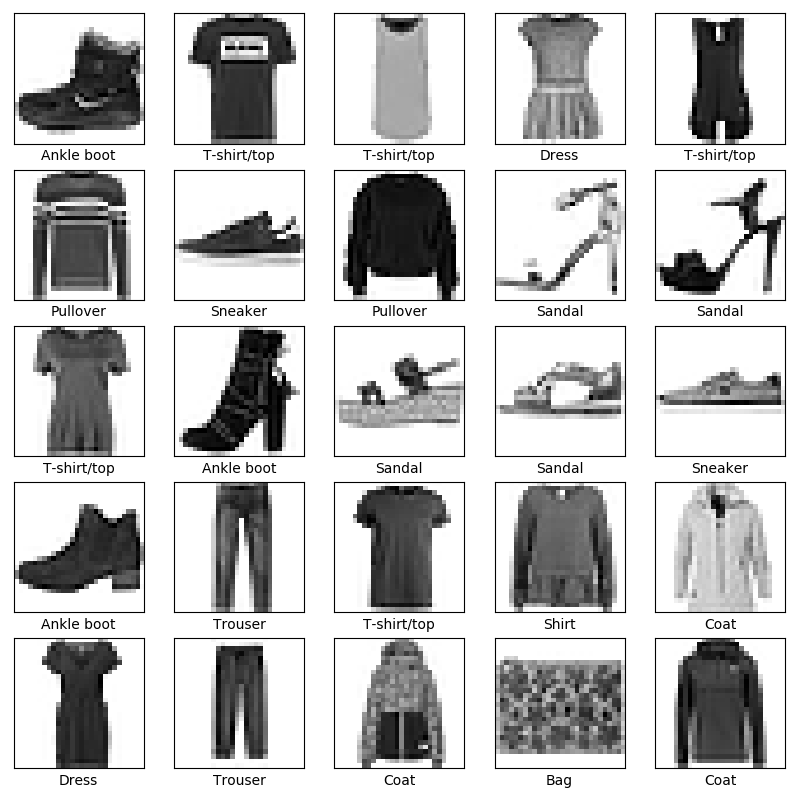

In [3]:
# train 앞 25개를 보자
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10), dpi=100)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.savefig("result.png", c="a")
plt.show()

In [0]:
# nomalize

train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [4]:
import numpy as np
import collections

train_images_sel, train_labels_sel = np.empty((0, 28*28)), np.empty((0))

print(train_images_sel.shape)
print(train_labels_sel.shape)
print('\n')

for i in range(10):
    chosen_idx = np.random.choice(np.where(train_labels == i)[0], replace=False, size=1000)
    train_images_sel = np.concatenate((train_images_sel, train_images[chosen_idx].reshape(-1, 28*28)))
    train_labels_sel = np.concatenate((train_labels_sel, train_labels[chosen_idx]))

print(train_images_sel.shape)
print(train_labels_sel.shape)
print('\n')


train_labels_sel_occurence = collections.Counter(train_labels_sel)

print('number of samples per class:\n')

for i in range(10): 
  print(class_names[i],' \t: ', train_labels_sel_occurence[i])

(0, 784)
(0,)


(10000, 784)
(10000,)


number of samples per class:

T-shirt/top  	:  1000
Trouser  	:  1000
Pullover  	:  1000
Dress  	:  1000
Coat  	:  1000
Sandal  	:  1000
Shirt  	:  1000
Sneaker  	:  1000
Bag  	:  1000
Ankle boot  	:  1000


In [0]:
# symmetric properties

from sklearn.manifold import TSNE

tsne = TSNE(random_state=42).fit_transform(train_images_sel)

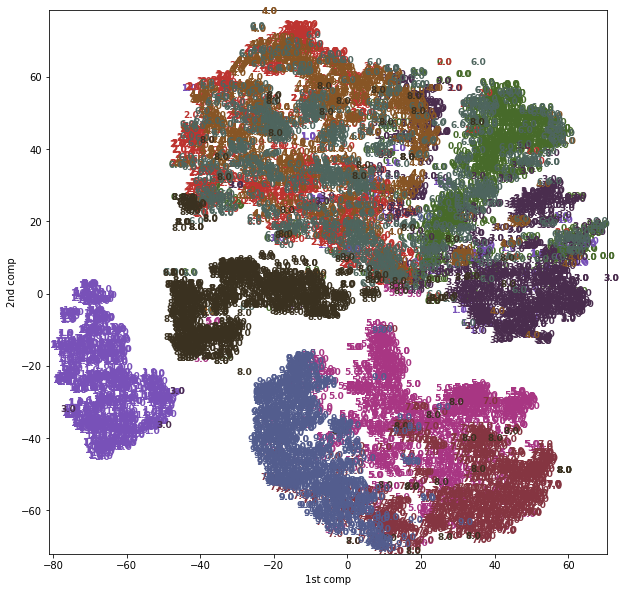

In [11]:
plt.figure(figsize=(10, 10))

plt.xlim(tsne[:, 0].min(), tsne[:, 0].max()+1)

plt.ylim(tsne[:, 1].min(), tsne[:, 1].max()+1)



colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]



for i in range(len(tsne)):

    plt.text(tsne[i, 0], tsne[i, 1], str(train_labels_sel[i]), color=colors[int(train_labels_sel[i])], fontdict={'weight':'bold', 'size':9})

plt.xlabel("1st comp")

plt.ylabel("2nd comp")

plt.show()